In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np

In [2]:
building_df =  pd.read_csv("clean_data.csv")
building_df.head()

,CardNumber,DoorName,DirectionOfEntry,MessageDateTime,ServerDateTime
0,77803,P2 Elev Lobby Ent [Default],IN,5/8/19 0:00,5/8/19 0:00
1,79643,Serv Car 1 [Default],IN,5/8/19 0:00,5/8/19 0:00
2,77803,Garage Elev P1 [Default],IN,5/8/19 0:01,5/8/19 0:01
3,79707,Lwr Wacker Dock Ent [Default],IN,5/8/19 0:02,5/8/19 0:02
4,77803,Garage Elev P1 [Default],IN,5/8/19 0:03,5/8/19 0:03


In [3]:
building_df = building_df[building_df.CardNumber > 0]

building_df['ServerDateTime'] = pd.to_datetime(building_df['ServerDateTime'])
building_df['Date'] = pd.to_datetime(building_df['ServerDateTime'].dt.strftime('%m/%d/%Y'))
# df['Time'] = df['MessageDateTime'].dt.strftime('%H:%M:%S')
building_df['Hour'] = pd.to_numeric(building_df['ServerDateTime'].dt.strftime('%H'))
building_df['Minutes'] = building_df['ServerDateTime'].dt.strftime('%M')
building_df['DayOfMonth'] = building_df['ServerDateTime'].dt.strftime("%d")
building_df['WeekDay'] = building_df['ServerDateTime'].dt.weekday
building_df.head()

,CardNumber,DoorName,DirectionOfEntry,MessageDateTime,ServerDateTime,Date,Hour,Minutes,DayOfMonth,WeekDay
0,77803,P2 Elev Lobby Ent [Default],IN,5/8/19 0:00,2019-05-08 00:00:00,2019-05-08,0,00,08,2
1,79643,Serv Car 1 [Default],IN,5/8/19 0:00,2019-05-08 00:00:00,2019-05-08,0,00,08,2
2,77803,Garage Elev P1 [Default],IN,5/8/19 0:01,2019-05-08 00:01:00,2019-05-08,0,01,08,2
3,79707,Lwr Wacker Dock Ent [Default],IN,5/8/19 0:02,2019-05-08 00:02:00,2019-05-08,0,02,08,2
4,77803,Garage Elev P1 [Default],IN,5/8/19 0:03,2019-05-08 00:03:00,2019-05-08,0,03,08,2


In [4]:
grouped_df = building_df.groupby(['Date','Hour'])['CardNumber'].count().reset_index()
grouped_df.rename(columns={'CardNumber':'No Of Card Swipes'}, inplace=True)
grouped_df.head()

,Date,Hour,No Of Card Swipes
0,2019-05-08,0,58
1,2019-05-08,1,11
2,2019-05-08,2,6
3,2019-05-08,3,11
4,2019-05-08,4,12


In [26]:
grouped_df['Label'] = grouped_df['No Of Card Swipes'].shift(-1)
grouped_df.head()

C:\Users\Batuk Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Hour,No Of Card Swipes,Label
0,2019-05-08,0,58,11.0
1,2019-05-08,1,11,6.0
2,2019-05-08,2,6,11.0
3,2019-05-08,3,11,12.0
4,2019-05-08,4,12,70.0


In [6]:
grouped_df = grouped_df.dropna(subset=['Label'])

In [8]:
X = grouped_df[['No Of Card Swipes', 'Hour']]
y = grouped_df["Label"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5967, 2) (5967, 1)


In [9]:
data_binary_encoded = pd.get_dummies(X, columns=["Hour"])
data_binary_encoded.head()

,No Of Card Swipes,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,58,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

X = data_binary_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,No Of Card Swipes,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
2655,226,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
304,73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1858,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1292,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
70,77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
y

array([[ 11.],
       [  6.],
       [ 11.],
       ...,
       [161.],
       [520.],
       [218.]])

In [12]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

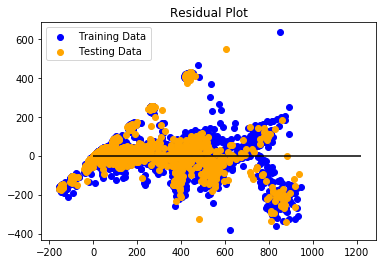

In [13]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 8035.1050268576, R2: 0.8583783970650285


In [23]:
# Plot the results 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train_scaled, y_train)


C:\Users\Batuk Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")
print(predictions)


MSE: 1073.3776461432535, R2: 0.9810813346815923
[ 17.5829632    9.17365871 182.06375    ... 639.71583333  22.89710931
 648.015     ]


In [25]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_train_scaled)
MSE = mean_squared_error(y_train, predictions)
r2 = model.score(X_train_scaled, y_train)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 302.7187165780526, R2: 0.9948391902997784


In [18]:
feature_names = data_binary_encoded.columns

In [19]:
sorted(zip(model.feature_importances_, feature_names), reverse=True)

[(0.795824665008329, 'No Of Card Swipes'),
 (0.12443299150220516, 'Hour_7'),
 (0.039164459977463345, 'Hour_6'),
 (0.01459434302022377, 'Hour_11'),
 (0.013172662012372858, 'Hour_12'),
 (0.0041285315476168715, 'Hour_5'),
 (0.003588597542195309, 'Hour_10'),
 (0.0011762560877689857, 'Hour_14'),
 (0.0009378286402746481, 'Hour_0'),
 (0.0008125947206150931, 'Hour_15'),
 (0.00047147050111234344, 'Hour_9'),
 (0.0004275667505075325, 'Hour_17'),
 (0.0003288283335114311, 'Hour_4'),
 (0.0002285995284448713, 'Hour_16'),
 (0.00014053334646638594, 'Hour_23'),
 (0.00013957388639336722, 'Hour_13'),
 (0.0001202590558007415, 'Hour_18'),
 (7.898330103888849e-05, 'Hour_22'),
 (6.781265624873119e-05, 'Hour_21'),
 (5.757343717527738e-05, 'Hour_8'),
 (4.885656359862478e-05, 'Hour_20'),
 (2.25497005814216e-05, 'Hour_19'),
 (1.2952003895073033e-05, 'Hour_1'),
 (1.1104020691134841e-05, 'Hour_3'),
 (1.0406855469180015e-05, 'Hour_2')]

In [20]:
names = data_binary_encoded.columns.to_list()

In [21]:
rf = model
sorted_idx =rf.feature_importances_.argsort()

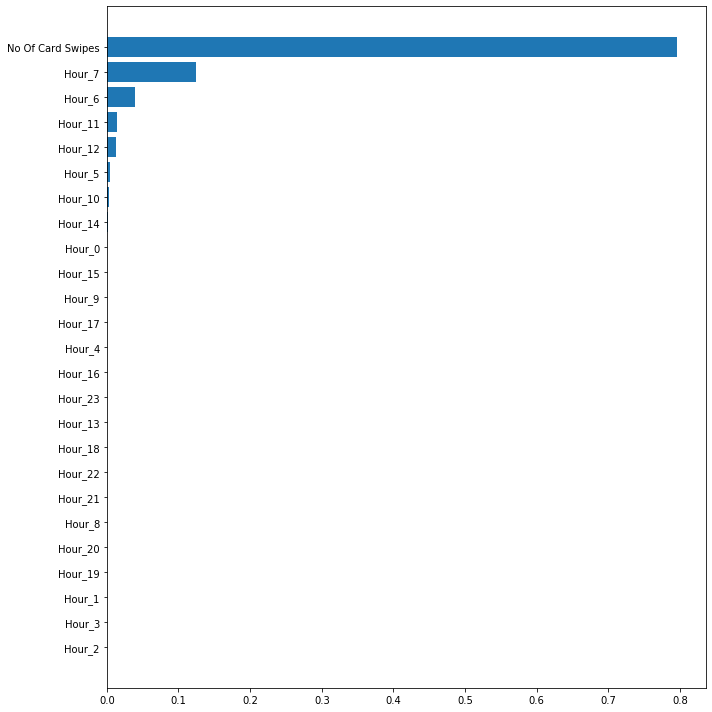

In [22]:
y_ticks = np.arange(0, len(names))
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(y_ticks, rf.feature_importances_[sorted_idx])
ax.set_yticklabels(np.array(names)[sorted_idx])
ax.set_yticks(y_ticks)
# ax.set_title(“Random Forest Feature Importances (MDI)“)
fig.tight_layout()
plt.show()